In [7]:
import pandas as pd
import numpy as np

sentiment_drive_link = 'https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing'
trader_drive_link = 'https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing'

def convert_drive_link(drive_link):
    file_id = drive_link.split('/d/')[1].split('/')[0]
    return f'https://drive.google.com/uc?id={file_id}'

sentiment_url = convert_drive_link(sentiment_drive_link)
trader_url = convert_drive_link(trader_drive_link)

sentiment_df = pd.read_csv(sentiment_url)
trader_df = pd.read_csv(trader_url)

print(f"Shape: {sentiment_df.shape}")
print(f"Shape: {trader_df.shape}")

Shape: (2644, 4)
Shape: (211224, 16)


In [8]:
print(sentiment_df.columns.tolist())
print(trader_df.columns.tolist())

['timestamp', 'value', 'classification', 'date']
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [9]:
print(sentiment_df.head())
print(trader_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [14]:
print(sentiment_df.info())
print("\n")
print(trader_df.info())
print("\n")

print("Sentiment Dataset Missing Values:")
print(sentiment_df.isnull().sum())
print("\n")
print("Trader Dataset Missing Values:")
print(trader_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224

In [16]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])


print("Sentiment Dataset - date column:")
print(sentiment_df['date'].head())
print(f"Data type: {sentiment_df['date'].dtype}\n")

print("Trader Dataset - Timestamp IST column:")
print(trader_df['Timestamp IST'].head())
print(f"Data type: {trader_df['Timestamp IST'].dtype}\n")

print("Trader Dataset - new date column (for merging):")
print(trader_df['date'].head())
print(f"Data type: {trader_df['date'].dtype}")

Sentiment Dataset - date column:
0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: date, dtype: datetime64[ns]
Data type: datetime64[ns]

Trader Dataset - Timestamp IST column:
0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: Timestamp IST, dtype: datetime64[ns]
Data type: datetime64[ns]

Trader Dataset - new date column (for merging):
0   2024-12-02
1   2024-12-02
2   2024-12-02
3   2024-12-02
4   2024-12-02
Name: date, dtype: datetime64[ns]
Data type: datetime64[ns]


In [36]:
print("SENTIMENT DATASET:")
print(f"  Earliest date: {sentiment_df['date'].min()}")
print(f"  Latest date:   {sentiment_df['date'].max()}")
print(f"  Total days:    {len(sentiment_df)}")
print()

print("TRADER DATASET:")
print(f"  Earliest date: {trader_df['date'].min()}")
print(f"  Latest date:   {trader_df['date'].max()}")
print(f"  Total days:    {trader_df['date'].nunique()}")
print(f"  Total trades:  {len(trader_df)}")
print()

overlap_start = max(sentiment_df['date'].min(), trader_df['date'].min())
overlap_end = min(sentiment_df['date'].max(), trader_df['date'].max())

if overlap_start <= overlap_end:
    print("OVERLAP EXISTS:")
    print(f"  Analysis period: {overlap_start.date()} to {overlap_end.date()}")
    overlap_days = (overlap_end - overlap_start).days + 1
    print(f"  Days with both sentiment and trade data: ~{overlap_days}")
else:
    print("No date overlap between datasets!")

SENTIMENT DATASET:
  Earliest date: 2018-02-01 00:00:00
  Latest date:   2025-05-02 00:00:00
  Total days:    2644

TRADER DATASET:
  Earliest date: 2023-05-01 00:00:00
  Latest date:   2025-05-01 00:00:00
  Total days:    480
  Total trades:  211224

OVERLAP EXISTS:
  Analysis period: 2023-05-01 to 2025-05-01
  Days with both sentiment and trade data: ~732


In [19]:
merged_df = pd.merge(
    trader_df, 
    sentiment_df[['date', 'classification', 'value']], 
    on='date', 
    how='inner'  
)


print(f"Original trader dataset:  {len(trader_df):,} trades")
print(f"Merged dataset:          {len(merged_df):,} trades")
print(f"Trades lost in merge:    {len(trader_df) - len(merged_df):,}")
print()

print("First 3 rows of merged dataset:")
print(merged_df[['Account', 'Coin', 'Execution Price', 'Side', 'Closed PnL', 
                  'Timestamp IST', 'date', 'classification', 'value']].head(3))
print()

print("Sentiment Distribution in Merged Dataset:")
print(merged_df['classification'].value_counts().sort_index())

Original trader dataset:  211,224 trades
Merged dataset:          211,218 trades
Trades lost in merge:    6

First 3 rows of merged dataset:
                                      Account  Coin  Execution Price Side  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769  BUY   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800  BUY   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855  BUY   

   Closed PnL       Timestamp IST       date classification  value  
0         0.0 2024-12-02 22:50:00 2024-12-02  Extreme Greed     80  
1         0.0 2024-12-02 22:50:00 2024-12-02  Extreme Greed     80  
2         0.0 2024-12-02 22:50:00 2024-12-02  Extreme Greed     80  

Sentiment Distribution in Merged Dataset:
classification
Extreme Fear     21400
Extreme Greed    39992
Fear             61837
Greed            50303
Neutral          37686
Name: count, dtype: int64


In [23]:
trader_metrics = merged_df.groupby('Account').agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'Size USD': 'mean',
    'Fee': 'sum'
}).reset_index()

trader_metrics.columns = ['Account', 'Total_PnL', 'Avg_PnL_Per_Trade', 'Num_Trades', 'Avg_Trade_Size_USD', 'Total_Fees']

wins_per_trader = merged_df[merged_df['Closed PnL'] > 0].groupby('Account').size()
trader_metrics['Win_Rate'] = (wins_per_trader / trader_metrics['Num_Trades'] * 100).fillna(0)

winning_pnl = merged_df[merged_df['Closed PnL'] > 0].groupby('Account')['Closed PnL'].sum()
losing_pnl = merged_df[merged_df['Closed PnL'] < 0].groupby('Account')['Closed PnL'].sum().abs()
trader_metrics['Profit_Factor'] = (winning_pnl / losing_pnl).fillna(0).replace([np.inf, -np.inf], 0)

trader_metrics['Net_PnL'] = trader_metrics['Total_PnL'] - trader_metrics['Total_Fees']


print(f"Total unique traders: {len(trader_metrics)}")
print("\nFirst 5 traders:")
print(trader_metrics.head())
print("\nMetrics Summary Statistics:")
print(trader_metrics[['Total_PnL', 'Win_Rate', 'Profit_Factor', 'Num_Trades']].describe())

Total unique traders: 32

First 5 traders:
                                      Account     Total_PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04   
2  0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05   

   Avg_PnL_Per_Trade  Num_Trades  Avg_Trade_Size_USD   Total_Fees  Win_Rate  \
0         419.127768        3818        16159.576734  7405.312304       0.0   
1           6.577654        7280         1653.226327  2729.837889       0.0   
2         -18.492043        3809         8893.000898  9280.982850       0.0   
3           9.951530       13311          507.626933  2218.367366       0.0   
4          52.071011        3239         3138.894782  3108.196722       0.0   

   Profit_Factor       Net_PnL  
0            NaN  1.592825e+06  
1            NaN  4.515548e+04  
2   

In [24]:
print("Closed PnL Statistics:")
print(merged_df['Closed PnL'].describe())
print()

print("PnL Distribution:")
print(f"  Profitable trades (PnL > 0):  {(merged_df['Closed PnL'] > 0).sum():,}")
print(f"  Break-even trades (PnL = 0):  {(merged_df['Closed PnL'] == 0).sum():,}")
print(f"  Losing trades (PnL < 0):      {(merged_df['Closed PnL'] < 0).sum():,}")
print()

print("Sample of trades with PnL != 0:")
non_zero_pnl = merged_df[merged_df['Closed PnL'] != 0]
if len(non_zero_pnl) > 0:
    print(non_zero_pnl[['Account', 'Coin', 'Side', 'Closed PnL', 'Direction', 'Start Position']].head(10))
else:
    print("  No trades with non-zero PnL found!")
    
print()
print("Understanding the data:")
print(merged_df[['Side', 'Direction', 'Closed PnL', 'Start Position']].head(10))

Closed PnL Statistics:
count    211218.000000
mean         48.549304
std         917.989791
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.790132
max      135329.090100
Name: Closed PnL, dtype: float64

PnL Distribution:
  Profitable trades (PnL > 0):  86,863
  Break-even trades (PnL = 0):  106,816
  Losing trades (PnL < 0):      17,539

Sample of trades with PnL != 0:
                                       Account  Coin  Side   Closed PnL  \
44  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  SELL  3008.231185   
45  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  SELL    30.741534   
46  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  SELL    40.770089   
47  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  SELL   243.812267   
48  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  SELL   254.263735   
49  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  SELL    24.301227   
50  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  SELL   134.

In [25]:
closed_trades = merged_df[merged_df['Closed PnL'] != 0].copy()

print(f"Total trades:        {len(merged_df):,}")
print(f"Closed trades only:  {len(closed_trades):,} ({len(closed_trades)/len(merged_df)*100:.1f}%)")
print(f"Opening trades:      {len(merged_df) - len(closed_trades):,}")
print()

trader_metrics = closed_trades.groupby('Account').agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'Size USD': 'mean',
    'Fee': 'sum'
}).reset_index()

trader_metrics.columns = ['Account', 'Total_PnL', 'Avg_PnL_Per_Trade', 'Num_Closed_Trades', 'Avg_Trade_Size_USD', 'Total_Fees']

wins_per_trader = closed_trades[closed_trades['Closed PnL'] > 0].groupby('Account').size()
trader_metrics['Win_Rate'] = (wins_per_trader / trader_metrics['Num_Closed_Trades'] * 100).fillna(0)

winning_pnl = closed_trades[closed_trades['Closed PnL'] > 0].groupby('Account')['Closed PnL'].sum()
losing_pnl = closed_trades[closed_trades['Closed PnL'] < 0].groupby('Account')['Closed PnL'].sum().abs()
trader_metrics['Profit_Factor'] = (winning_pnl / losing_pnl).fillna(0).replace([np.inf, -np.inf], 0)

# Net PnL after fees
trader_metrics['Net_PnL'] = trader_metrics['Total_PnL'] - trader_metrics['Total_Fees']

print(f"Total unique traders: {len(trader_metrics)}")
print("\nTop 5 traders by Total PnL:")
print(trader_metrics.nlargest(5, 'Total_PnL')[['Account', 'Total_PnL', 'Win_Rate', 'Profit_Factor', 'Num_Closed_Trades']])
print("\nMetrics Summary Statistics:")
print(trader_metrics[['Total_PnL', 'Win_Rate', 'Profit_Factor', 'Num_Closed_Trades']].describe())

Total trades:        211,218
Closed trades only:  104,402 (49.4%)
Opening trades:      106,816

Total unique traders: 32

Top 5 traders by Total PnL:
                                       Account     Total_PnL  Win_Rate  \
27  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06       0.0   
0   0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06       0.0   
29  0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05       0.0   
13  0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05       0.0   
31  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05       0.0   

    Profit_Factor  Num_Closed_Trades  
27            NaN               6279  
0             NaN               1732  
29            NaN               9997  
13            NaN               5482  
31            NaN              22551  

Metrics Summary Statistics:
          Total_PnL  Win_Rate  Profit_Factor  Num_Closed_Trades
count  3.200000e+01      32.0            0.0          32.000000
mean   3.20452

In [26]:
top_trader = '0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23'

trader_closed = closed_trades[closed_trades['Account'] == top_trader]

print(f"Top trader: {top_trader}")
print(f"Total closed trades: {len(trader_closed)}")
print(f"Profitable trades: {(trader_closed['Closed PnL'] > 0).sum()}")
print(f"Break-even trades: {(trader_closed['Closed PnL'] == 0).sum()}")
print(f"Losing trades: {(trader_closed['Closed PnL'] < 0).sum()}")
print()

print("PnL distribution for this trader:")
print(trader_closed['Closed PnL'].describe())
print()

wins_per_trader = closed_trades[closed_trades['Closed PnL'] > 0].groupby('Account').size()
print("Wins per trader (first 5):")
print(wins_per_trader.head())
print()

print("Checking trader_metrics structure:")
print(trader_metrics[['Account', 'Num_Closed_Trades', 'Win_Rate']].head())

Top trader: 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23
Total closed trades: 6279
Profitable trades: 4967
Break-even trades: 0
Losing trades: 1312

PnL distribution for this trader:
count     6279.000000
mean       341.357318
std       2088.875166
min      -5028.066368
25%          0.171613
50%         22.450106
75%         88.454155
max      48504.095550
Name: Closed PnL, dtype: float64

Wins per trader (first 5):
Account
0x083384f897ee0f19899168e3b1bec365f52a9012    1373
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    3223
0x271b280974205ca63b716753467d5a371de622ab    1150
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    5838
0x2c229d22b100a7beb69122eed721cee9b24011dd    1684
dtype: int64

Checking trader_metrics structure:
                                      Account  Num_Closed_Trades  Win_Rate
0  0x083384f897ee0f19899168e3b1bec365f52a9012               1732       0.0
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd               4166       0.0
2  0x271b280974205ca63b716753467d5a371de622ab

In [35]:
trader_metrics = closed_trades.groupby('Account').agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'Size USD': 'mean',
    'Fee': 'sum'
}).reset_index()

trader_metrics.columns = ['Account', 'Total_PnL', 'Avg_PnL_Per_Trade', 'Num_Closed_Trades', 'Avg_Trade_Size_USD', 'Total_Fees']

wins_per_trader = closed_trades[closed_trades['Closed PnL'] > 0].groupby('Account').size()
trader_metrics['Num_Wins'] = trader_metrics['Account'].map(wins_per_trader).fillna(0)
trader_metrics['Win_Rate'] = (trader_metrics['Num_Wins'] / trader_metrics['Num_Closed_Trades'] * 100)

winning_pnl = closed_trades[closed_trades['Closed PnL'] > 0].groupby('Account')['Closed PnL'].sum()
losing_pnl = closed_trades[closed_trades['Closed PnL'] < 0].groupby('Account')['Closed PnL'].sum().abs()

trader_metrics['Total_Wins'] = trader_metrics['Account'].map(winning_pnl).fillna(0)
trader_metrics['Total_Losses'] = trader_metrics['Account'].map(losing_pnl).fillna(0)
trader_metrics['Profit_Factor'] = trader_metrics['Total_Wins'] / trader_metrics['Total_Losses']
trader_metrics['Profit_Factor'] = trader_metrics['Profit_Factor'].replace([np.inf], 999)  # Cap infinite values

trader_metrics['Net_PnL'] = trader_metrics['Total_PnL'] - trader_metrics['Total_Fees']

print(f"Total unique traders: {len(trader_metrics)}\n")

print("Top 5 traders by Total PnL:")
print(trader_metrics.nlargest(5, 'Total_PnL')[['Account', 'Total_PnL', 'Win_Rate', 'Profit_Factor', 'Num_Closed_Trades']])
print("\n")
print("Summary Statistics:")
print(trader_metrics[['Total_PnL', 'Win_Rate', 'Profit_Factor', 'Num_Closed_Trades']].describe())


Total unique traders: 32

Top 5 traders by Total PnL:
                                       Account     Total_PnL   Win_Rate  \
27  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06  79.104953   
0   0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06  79.272517   
29  0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05  99.119736   
13  0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05  89.547610   
31  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05  76.307037   

    Profit_Factor  Num_Closed_Trades  
27      36.095616               6279  
0        4.708739               1732  
29   27208.369847               9997  
13       5.902045               5482  
31       3.862477              22551  


Summary Statistics:
          Total_PnL    Win_Rate  Profit_Factor  Num_Closed_Trades
count  3.200000e+01   32.000000      32.000000          32.000000
mean   3.204527e+05   85.004346    1023.911470        3262.562500
std    4.946596e+05   11.771499    4792.9

In [29]:
pnl_75th = trader_metrics['Total_PnL'].quantile(0.75)
pnl_25th = trader_metrics['Total_PnL'].quantile(0.25)

def assign_segment(pnl):
    if pnl >= pnl_75th:
        return 'Whale'
    elif pnl <= pnl_25th:
        return 'Retail'
    else:
        return 'Mid-Tier'

trader_metrics['Segment'] = trader_metrics['Total_PnL'].apply(assign_segment)

print("Segment Distribution:")
print(trader_metrics['Segment'].value_counts())
print()

print("Segment Performance Comparison:")
segment_summary = trader_metrics.groupby('Segment')[['Total_PnL', 'Win_Rate', 'Profit_Factor', 'Num_Closed_Trades']].mean()
print(segment_summary)
print()

account_to_segment = trader_metrics.set_index('Account')['Segment'].to_dict()
merged_df['Trader_Segment'] = merged_df['Account'].map(account_to_segment)

print("Segment labels added to main dataset!")
print(f"Merged dataset now has {len(merged_df.columns)} columns including 'Trader_Segment'")


Segment Distribution:
Segment
Mid-Tier    16
Whale        8
Retail       8
Name: count, dtype: int64

Segment Performance Comparison:
              Total_PnL   Win_Rate  Profit_Factor  Num_Closed_Trades
Segment                                                             
Mid-Tier  157643.896274  89.959099     276.700784          2395.6875
Retail    -18967.401519  73.495598       2.470560          2057.6250
Whale     985490.477635  86.603587    3539.773751          6201.2500

Segment labels added to main dataset!
Merged dataset now has 20 columns including 'Trader_Segment'


In [30]:
sentiment_analysis = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum', 'count'],
    'Size USD': 'mean',
    'Trade ID': 'count'  # Total trades (including opens)
}).round(2)

sentiment_analysis.columns = ['Avg_PnL', 'Total_PnL', 'Closed_Trades', 'Avg_Trade_Size', 'Total_Trades']
print(sentiment_analysis)
print()

profitable_by_sentiment = merged_df[merged_df['Closed PnL'] > 0].groupby('classification').size()
total_closed_by_sentiment = merged_df[merged_df['Closed PnL'] != 0].groupby('classification').size()
profitability_rate = (profitable_by_sentiment / total_closed_by_sentiment * 100).round(2)

print("Percentage of Profitable Closed Trades:")
for sentiment, rate in profitability_rate.items():
    print(f"  {sentiment:15s}: {rate:5.2f}%")


                Avg_PnL   Total_PnL  Closed_Trades  Avg_Trade_Size  \
classification                                                       
Extreme Fear      34.54   739110.25          21400         5349.73   
Extreme Greed     67.89  2715171.31          39992         3112.25   
Fear              54.29  3357155.44          61837         7816.11   
Greed             42.74  2150129.27          50303         5736.88   
Neutral           34.31  1292920.68          37686         4782.73   

                Total_Trades  
classification                
Extreme Fear           21400  
Extreme Greed          39992  
Fear                   61837  
Greed                  50303  
Neutral                37686  

Percentage of Profitable Closed Trades:
  Extreme Fear   : 76.22%
  Extreme Greed  : 89.17%
  Fear           : 87.29%
  Greed          : 76.89%
  Neutral        : 82.39%


In [31]:
segmented_df = merged_df[merged_df['Trader_Segment'].notna()].copy()

segment_sentiment = segmented_df.groupby(['Trader_Segment', 'classification']).agg({
    'Closed PnL': 'mean',
    'Size USD': 'mean',
    'Trade ID': 'count'
}).round(2)

segment_sentiment.columns = ['Avg_PnL', 'Avg_Trade_Size_USD', 'Num_Trades']
print(segment_sentiment)
print()

for segment in ['Whale', 'Mid-Tier', 'Retail']:
    print(f"\n{segment} Traders:")
    segment_data = segmented_df[segmented_df['Trader_Segment'] == segment]
    
    for sentiment in ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']:
        sentiment_data = segment_data[segment_data['classification'] == sentiment]
        closed = sentiment_data[sentiment_data['Closed PnL'] != 0]
        
        if len(closed) > 0:
            profitable = (closed['Closed PnL'] > 0).sum()
            profit_rate = profitable / len(closed) * 100
            avg_pnl = closed['Closed PnL'].mean()
            print(f"  {sentiment:15s}: {profit_rate:5.1f}% profitable | Avg PnL: ${avg_pnl:8.2f} | Trades: {len(closed):5d}")


                               Avg_PnL  Avg_Trade_Size_USD  Num_Trades
Trader_Segment classification                                         
Mid-Tier       Extreme Fear      97.16             5550.65        3237
               Extreme Greed     36.47             3203.90       25805
               Fear              41.99             3328.17       13031
               Greed             28.99             3347.21       21578
               Neutral            6.97             3375.06       13478
Retail         Extreme Fear     -22.58             8401.24        5845
               Extreme Greed     19.53             1175.82        4373
               Fear              29.29             9249.45       10760
               Greed            -50.84             2075.80        9250
               Neutral           11.05             4678.36        4515
Whale          Extreme Fear      45.18             3848.97       12318
               Extreme Greed    172.06             3734.12        9814
      

In [32]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 1.6 MB/s eta 0:00:001.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 1.9 MB/s eta 0:00:003.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.9 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 3.6 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 4.7 MB/s eta 0:00:00


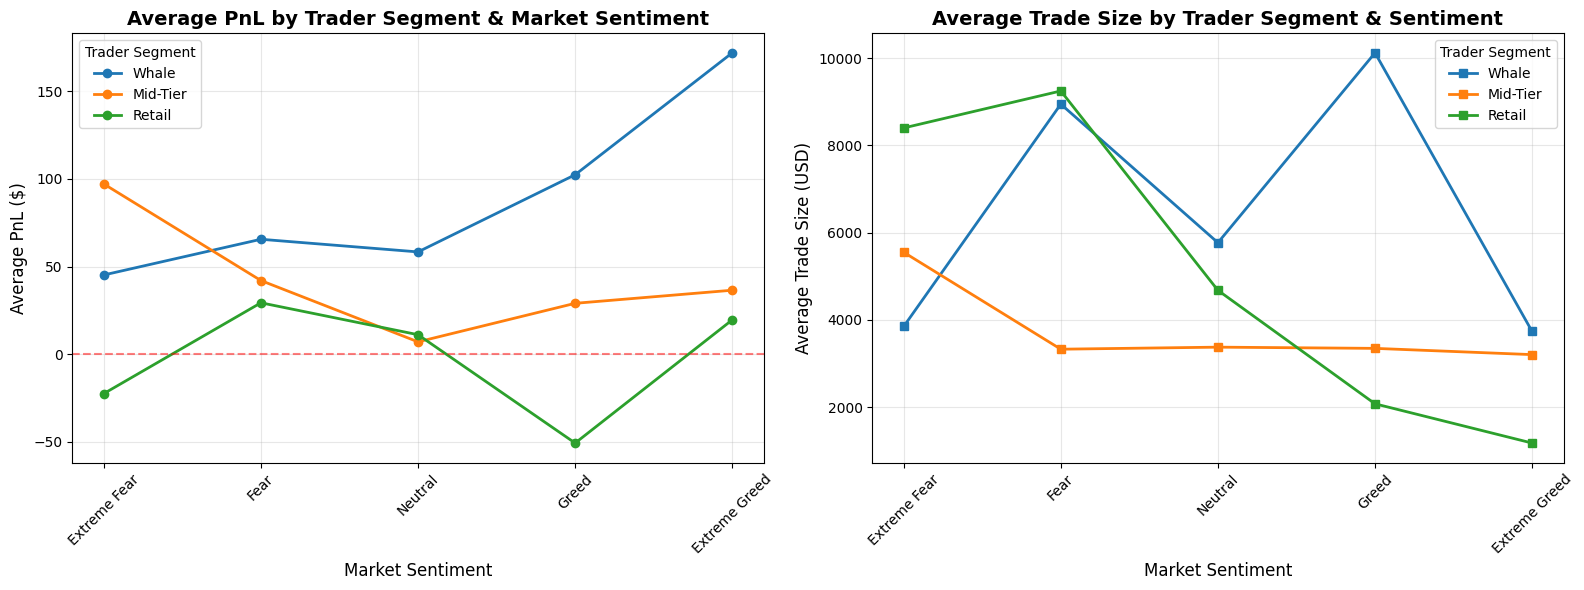

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
plot_data = segment_sentiment.reset_index()

for segment in ['Whale', 'Mid-Tier', 'Retail']:
    segment_data = plot_data[plot_data['Trader_Segment'] == segment]
    segment_data = segment_data.set_index('classification').reindex(sentiment_order)
    axes[0].plot(sentiment_order, segment_data['Avg_PnL'], marker='o', label=segment, linewidth=2)

axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0].set_title('Average PnL by Trader Segment & Market Sentiment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Market Sentiment', fontsize=12)
axes[0].set_ylabel('Average PnL ($)', fontsize=12)
axes[0].legend(title='Trader Segment', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

for segment in ['Whale', 'Mid-Tier', 'Retail']:
    segment_data = plot_data[plot_data['Trader_Segment'] == segment]
    segment_data = segment_data.set_index('classification').reindex(sentiment_order)
    axes[1].plot(sentiment_order, segment_data['Avg_Trade_Size_USD'], marker='s', label=segment, linewidth=2)

axes[1].set_title('Average Trade Size by Trader Segment & Sentiment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Market Sentiment', fontsize=12)
axes[1].set_ylabel('Average Trade Size (USD)', fontsize=12)
axes[1].legend(title='Trader Segment', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

